In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras

In [2]:
def plot_series(time, series, format='-', start=0, end = None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("time")
    plt.ylabel("value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [3]:
def trend(time, slope=0):
    return time*slope

### Trend and Seasonality

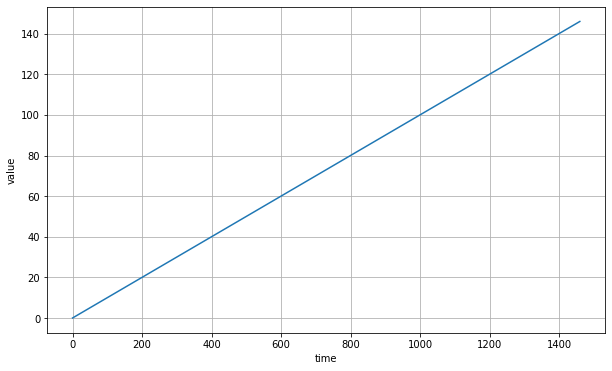

In [4]:
time = np.arange(4 * 365+1)
baseline = 10
series = trend(time,0.1)

plt.figure(figsize = (10,6))
plot_series(time,series)
plt.show()

In [5]:
def seasonal_pattern(season_time):
    """We create a repetitive pattern with time series data"""
    return np.where(season_time <0.4, np.cos(season_time * 2 * np.pi), 1/np.exp(3 * season_time))

def seasonality(time,period, amplitude=1, phase=0):
    """Repeats same pattern for every period"""
    season = ((time + phase) % period)/period
    return amplitude * seasonal_pattern(season)
    

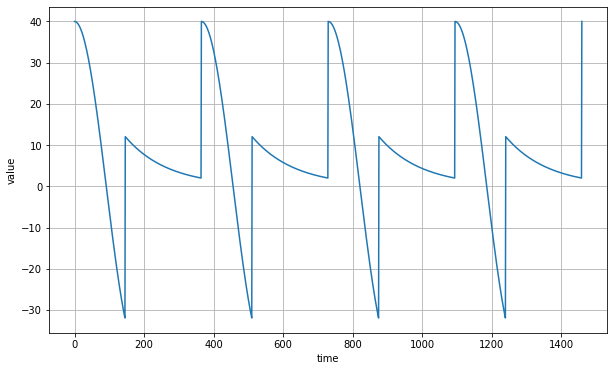

In [6]:
baseline = 10
amplitude = 40
series = seasonality(time, period=365, amplitude = amplitude)

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

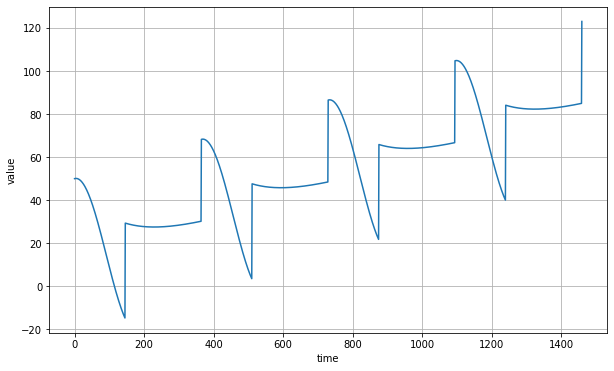

In [7]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude = amplitude)

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [8]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time))*noise_level

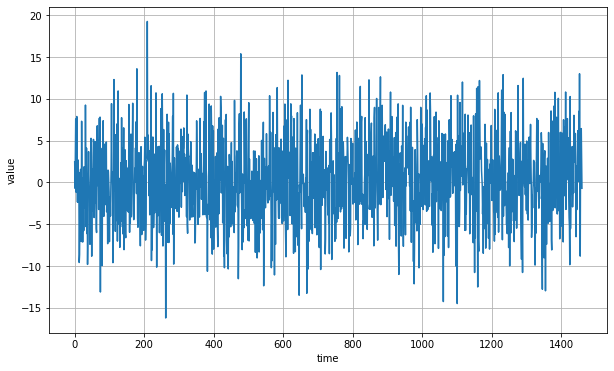

In [9]:
noise_level = 5 
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10,6))
plot_series(time, noise)
plt.show()

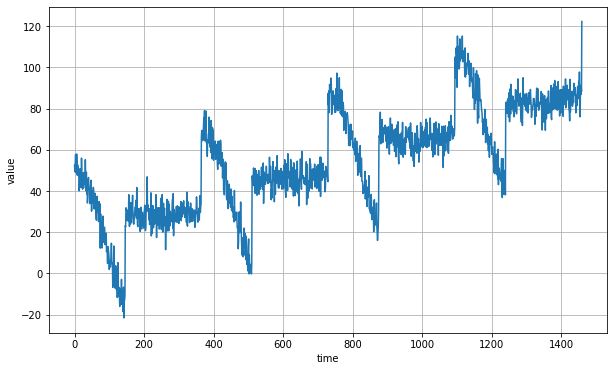

In [10]:
series += noise

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [11]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [12]:
def autocorrelation(time, amplitude, seed = None):
    rnd = np.random.RandomState(seed)
    p1 = 0.5
    p2 = -0.1
    ar = rnd.randn(len(time)+50)
    ar[:50] = 100
    for step in range(50, len(time) + 50):
        ar[step] += p1 * ar[step - 50]
        ar[step] += p2 * ar[step - 33]
    return ar[50:] * amplitude

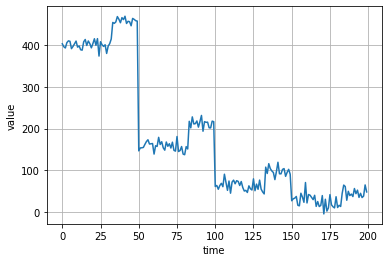

In [13]:
series = autocorrelation(time, 10, seed=42) 
plot_series(time[:200], series[:200])
plt.show()

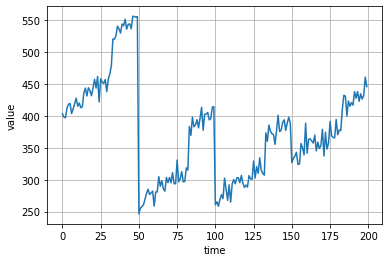

In [14]:
series = autocorrelation(time, 10 ,seed=42) + trend(time,2)
plot_series(time[:200], series[:200])
plt.show()

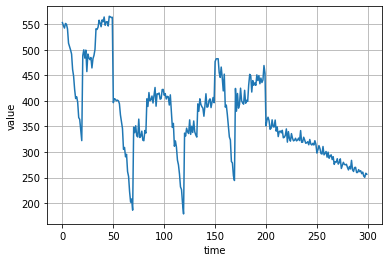

In [15]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time,2)
series2 = autocorrelation(time, 5 , seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550
series[200:] = series2[200:]
plot_series(time[:300], series[:300])
plt.show()

In [16]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    rnd = np.random.RandomState(seed)
    impulse_indices = rnd.randint(len(time), size =10)
    series = np.zeros(len(time))
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude
    return series

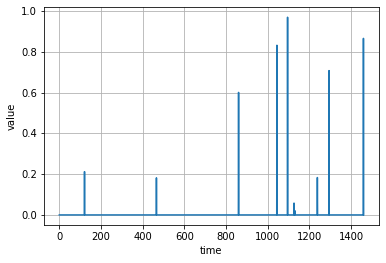

In [17]:
series = impulses(time, 10, seed=42)
plot_series(time, series)
plt.show()

Auto correlation is the degree of similarity between a given time series and a lagged version of itself over successive intervals.
ps is phi which is the autocorrelation coefficient to measure the strength of association between two variables.

In [18]:
def autocorrelation(source , øs):
    ar = source.copy()
    max_lag = len(øs)
    for step, value in enumerate(source):
        for lag, ø in øs.items():
            if step - lag > 0:
                ar[step] += ø * ar[step-lag]
    return ar

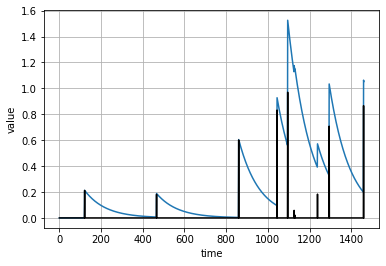

In [19]:
signal = impulses(time, 10, seed=42)
series = autocorrelation(signal, {1:0.99})
plot_series(time,series)
plt.plot(time,signal,"-k")
plt.show()

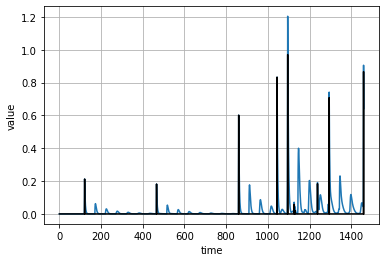

In [20]:
signal = impulses(time, 10,seed=42)
series = autocorrelation(signal, {1:0.70, 50:0.2})
plot_series(time, series)
plt.plot(time,signal,"k-")
plt.show()

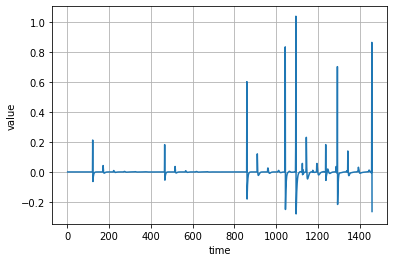

In [21]:
series_diff1 = series[1:] - series[:-1]
plot_series(time[1:], series_diff1)

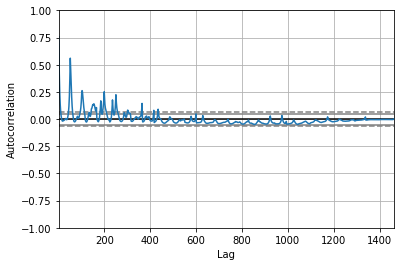

In [22]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.show()

In [23]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order = (5,1,0))
model_fit= model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1460
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2223.428
Method:                       css-mle   S.D. of innovations              0.053
Date:                Wed, 28 Apr 2021   AIC                          -4432.855
Time:                        23:34:33   BIC                          -4395.852
Sample:                             1   HQIC                         -4419.052
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.384      0.701      -0.001       0.002
ar.L1.D.y     -0.1235      0.026     -4.714      0.000      -0.175      -0.072
ar.L2.D.y     -0.1254      0.029     -4.333      0.0